In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Encoder
def encoder(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)  # Down to (14, 14, 64)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)  # Down to (7, 7, 128)
    return models.Model(inputs, x)

# Decoder
def decoder(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(inputs)  # Use 'inputs' here
    x = layers.UpSampling2D((2, 2))(x)  # Up to (14, 14, 128)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)  # Up to (28, 28, 64)
    # Output layer: 1 channel (grayscale), matching the input shape (28, 28, 1)
    x = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return models.Model(inputs, x)

# Combine encoder and decoder
def autoencoder(input_shape):
    enc = encoder(input_shape)
    dec = decoder(enc.output_shape[1:])
    return models.Model(enc.input, dec(enc.output))

# Load MNIST dataset
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # Reshape to add channel dimension
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Build and compile the autoencoder
autoencoder = autoencoder((28, 28, 1))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
# autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Predict reconstructed images
decoded_imgs = autoencoder.predict(x_test)


2024-09-19 10:20:50.361170: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-19 10:20:50.451395: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-19 10:20:50.784748: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-19 10:20:50.786449: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 10:20:52.832460: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

313/313 [==============================] - 18s 57ms/step


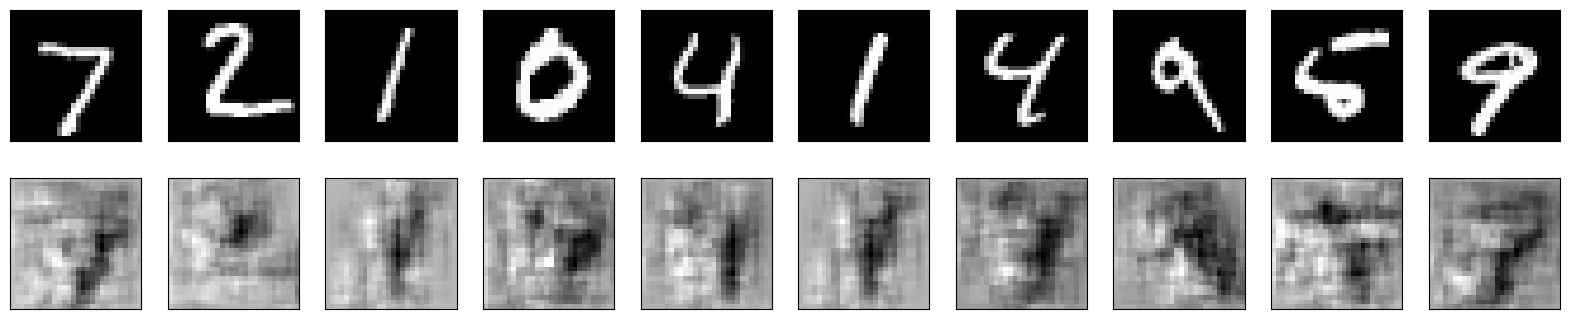

In [3]:
# reconstruct images
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# # Save the model
# autoencoder.save('autoencoder.h5')

# # Load the model
# autoencoder = models.load_model('autoencoder.h5')
# decoded_imgs = autoencoder.predict(x_test)

# # Predict reconstructed images
# decoded_imgs = autoencoder.predict(x_test)

# # reconstruct images
# import matplotlib.pyplot as plt
